<a href="https://colab.research.google.com/github/AmirGeo/Customer_Segmentation_for_an_automobile_company/blob/main/Customer_Segmentation_for_an_automobile_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
sns.set()

auto = pd.read_csv('/content/auto.csv')
auto.head() #returns the first five rows with their columns

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [2]:
auto.dtypes #returns datatypes of given columns

,0
ID,int64
Gender,object
Ever_Married,object
Age,int64
Graduated,object
Profession,object
Work_Experience,float64
Spending_Score,object
Family_Size,float64
Var_1,object


In [3]:
missing_values = auto.isnull().sum() #finds the null ('missing values') of the dataframe auto and counts them
print(missing_values)

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64


In [4]:
numerical_columns = ['Age', 'Family_Size','Work_Experience']

for column in numerical_columns:
  auto = auto.dropna(subset=[column]) #deleting all the rows that have missing values in numerical_columns

missing_values = auto.isnull().sum()
print(missing_values)

ID                  0
Gender              0
Ever_Married       42
Age                 0
Graduated          19
Profession         30
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              24
dtype: int64


In [5]:
categorical_columns = ['Ever_Married','Graduated','Profession','Var_1']

for column in categorical_columns:
  auto = auto.dropna(subset=[column]) #deleting all the rows that have missing values in categorical_columns

missing_values = auto.isnull().sum()
print(missing_values)

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


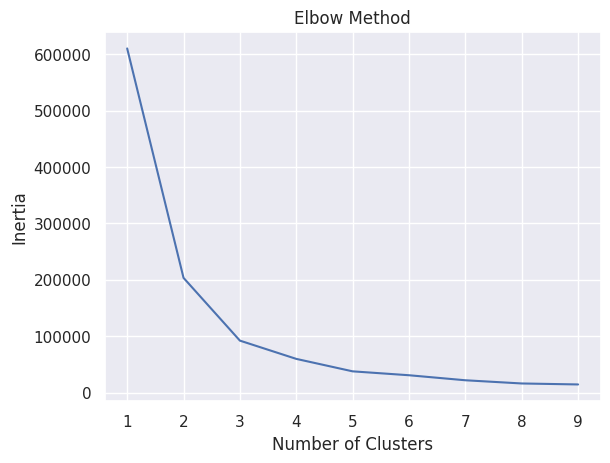

In [6]:
#using elbow method to find the needed number of clusters
inertias = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i,random_state=0,n_init='auto')
  kmeans.fit(auto[['Age','Family_Size']])
  inertias.append(kmeans.inertia_)

plt.plot(range(1,10),inertias)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [7]:
#according to the given elbow method, assume the designated number of clusters to be 3
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(auto[['Age','Family_Size']])

auto['Cluster'] = kmeans.predict(auto[['Age','Family_Size']])
auto.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,2
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,2
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,1
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,2
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,1


Text(0.5, 1.0, 'Correlation of Age and Family Size')

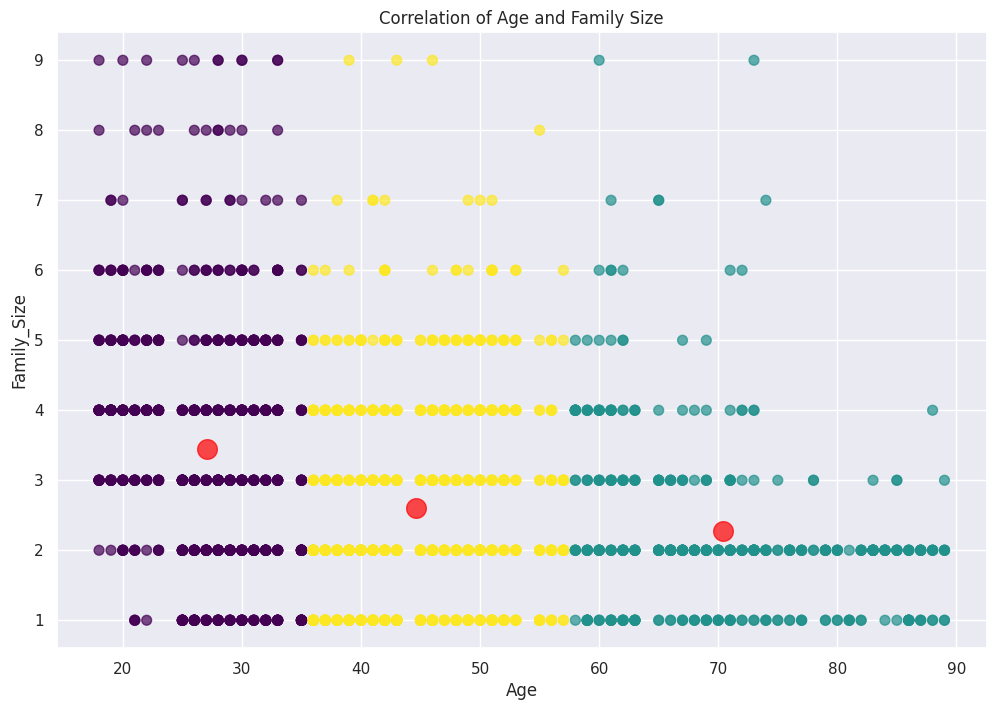

In [8]:
plt.figure(figsize=(12, 8))

plt.scatter(auto['Age'],auto['Family_Size'],c=auto['Cluster'],cmap='viridis',alpha=0.7,s=50) #showcasing graph of age and family size

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.7) #finding centroids of found clusters
plt.xlabel('Age')
plt.ylabel('Family_Size')
plt.title('Correlation of Age and Family Size')